<a href="https://colab.research.google.com/gist/carlthome/ccc674c4ebf1212fe99c6d6518333300/sound-effect-waveform-visualization-tinkering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa as lr

In [2]:
waveform, samplerate = lr.load("Guns, Mechanism, Air Rifle, Reload, Interior, Distant 01 SND36107.wav", sr=None, mono=False)
waveform.shape

(2, 425472)

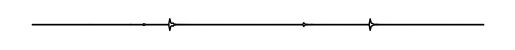

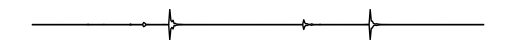

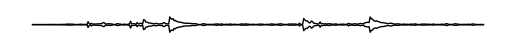

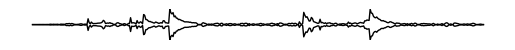

In [3]:
def plot_waveform(waveform):
    px = 1/plt.rcParams["figure.dpi"]
    plt.figure(figsize=(640*px, 40*px))

    frames = lr.util.frame(x=waveform, frame_length=1024, hop_length=1024)
    peaks = np.max(frames, axis=0)

    plt.plot(peaks, linewidth=1, color="black")
    plt.plot(-peaks, linewidth=1, color="black")

    plt.ylim((-1.0, 1.0))
    plt.box(False)

    plt.tick_params(axis="y", which="both", left=False, labelleft=False)
    plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
    plt.show()


# Downmix to mono.
x = waveform.mean(axis=0)
plot_waveform(x)

# Apply peak normalization.
x = lr.util.normalize(x)
plot_waveform(x)

# Apply dynamic compression.
x = lr.mu_compress(x) / 255.0
plot_waveform(x)

# Apply peak normalization.
x = lr.util.normalize(x)
plot_waveform(x)